<a href="https://colab.research.google.com/github/SBU-AIC/summer-project/blob/main/AIC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Project Description
# @markdown Feel free to ask any questions about this project from your TAs. ;)
from IPython.display import IFrame
link_id = "1x2-V9q9agw8F3nCaTkv2uy6jyDE5y3LgKrisKXTjIDg/edit?usp=sharing"
print(f"If you want to download the slides: https://docs.google.com/document/d/{link_id}/")
IFrame(src=f"https://docs.google.com/document/d/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=1200, height=480)

If you want to download the slides: https://docs.google.com/document/d/1x2-V9q9agw8F3nCaTkv2uy6jyDE5y3LgKrisKXTjIDg/edit?usp=sharing/


In [ ]:
# @markdown import necessaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# @markdown Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [ ]:
# @markdown load data
from tqdm.notebook import tqdm
import os

urls = ['https://raw.githubusercontent.com/SBU-AIC/summer-project/main/USDGBP.csv',
        'https://raw.githubusercontent.com/SBU-AIC/summer-project/main/USDJPY.csv']

progress = tqdm(total=len(urls))

for url in urls:
  !wget $url -q

  progress.set_description(f"Downloading files")
  progress.update(1)

progress.close()

usd_gbp = pd.read_csv('USDGBP.csv', parse_dates=[0])
usd_jpy = pd.read_csv('USDJPY.csv', parse_dates=[0])


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
usd_dataset = usd_jpy.merge(right=usd_gbp, how='left', on='Date')
usd_dataset = usd_dataset.dropna(axis=0, how='any') # drop missing values
usd_dataset.head()

,Date,USDJPY,USDGBP
0,2017-05-26,111.33,0.7809
1,2017-05-25,111.84,0.7727
2,2017-05-24,111.49,0.7708
3,2017-05-23,111.78,0.7716
4,2017-05-22,111.30,0.7693


# Preprocess Dataset and plot

Text(0, 0.5, 'USDGBP')

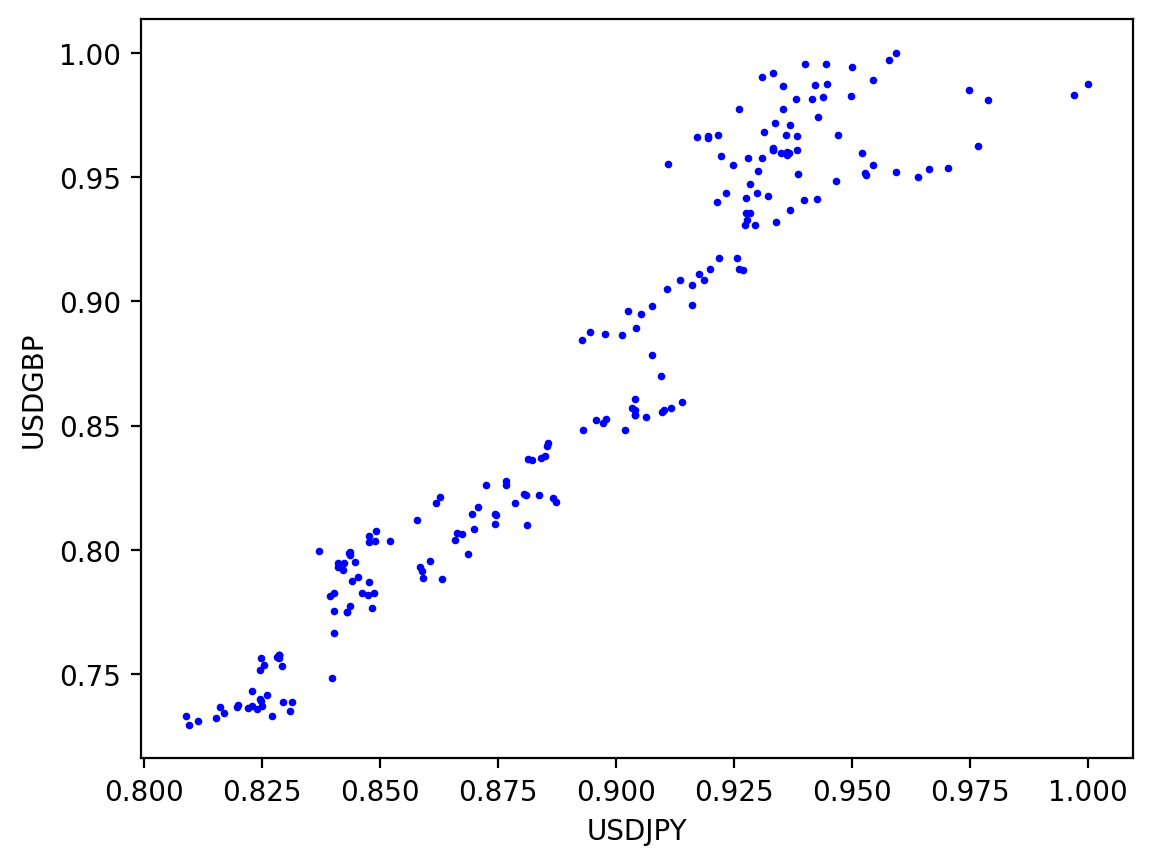

In [ ]:
days = 200
inp_feature = 'USDJPY'
out_feature = 'USDGBP'
X = preprocessing.normalize(usd_dataset[inp_feature].values.reshape(-1, 1)[-days:], axis=0, norm='max')
y = preprocessing.normalize(usd_dataset[out_feature].values.reshape(-1, 1)[-days:], axis=0, norm='max')

plt.scatter(X, y, marker='o', color='blue', s=3)
plt.xlabel(inp_feature)
plt.ylabel(out_feature)

# Linear Regression best model prediction

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Coefficient :', np.round(model.coef_[0][0],decimals=4),
      '\nIntercept :', np.round(model.intercept_[0], decimals=4))

Coefficient : 1.7761 
Intercept : -0.719


Text(0, 0.5, 'USDGBP')

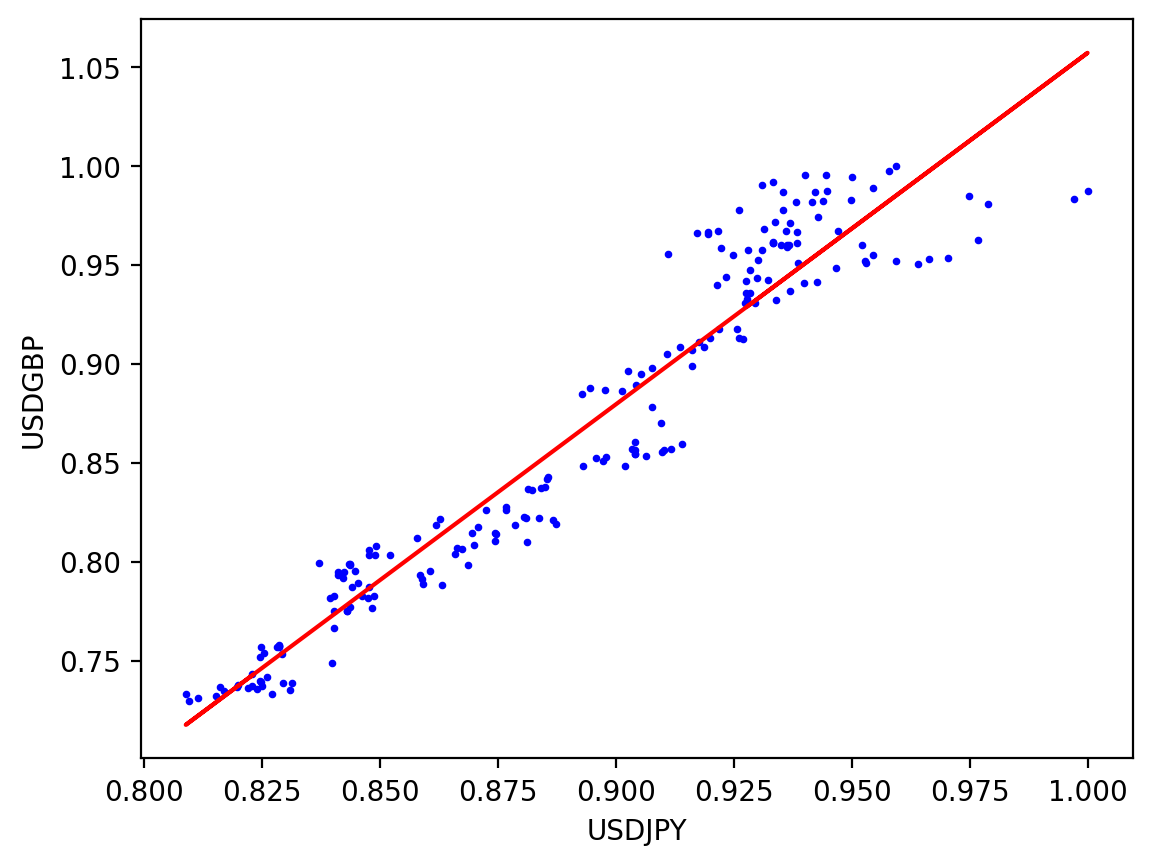

In [ ]:
# @markdown plot the result
line = model.predict(X)
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.plot(X, line, color='red')
plt.xlabel(inp_feature)
plt.ylabel(out_feature)

# Genetic algorithm Implementation

In [ ]:
class Genetic:

  def __init__(self, generations, population):
    self.generations = 100
    self.population = population

  def get_generations(self):
    return self.generations

  def fitness(solution):
      ############################################################################
      ## TODO: Calculate the fitness of the solution using the Ordinary Least Squares (OLS) method
      ## Fill in function and remove
      raise NotImplementedError("Please complete the fitness exercise")
      ############################################################################
      fitness_val = ...

      return fitness_val

  def genPopulation(self):
      '''Generate population of size individuals'''
      ############################################################################
      # TODO: Generate a population of size individuals with random coefficients and intercepts
      # Coefficients and intercept should be in the range [-1, 1] since all data has been normalized with the maximum value
      raise NotImplementedError("Please complete the Generate population exercise")
      ############################################################################
      population = self.population
      solutions = ...
      return solutions

  def selectBest(self, solutions):
      fitnesses = np.apply_along_axis(self.fitness, 1, solutions)
      return solutions[np.argsort(fitnesses, axis=0)[:20], :]

  def crossover(sol1, sol2):
      '''Perform crossover between two solutions by exchanging the intercepts and maintaining the coefficients'''
      ############################################################################
      # TODO: Perform crossover between sol1 and sol2 by exchanging the intercepts and maintaining the coefficients
      # Return the offspring solutions
      raise NotImplementedError("Please complete the crossover exercise")
      ############################################################################
      offsprings = ...
      return offsprings

  def mutation(sol):
      '''Perform mutation on the solution'''
      ############################################################################
      # TODO: Perform mutation on the solution with a certain probability (mutationProb)
      raise NotImplementedError("Please complete the mutation exercise")
      ############################################################################
      sol = ...
      return sol

  # Perform generationas while executing the genetic algorithm


## Run the algorithm and track the results with plot and compare with best linear regression model prediction

In [ ]:
genetic_instance = Genetic(generations=100, population=400)

solutions = genetic_instance.genPopulation()
generations = genetic_instance.get_generations()

best = []
inter_sol = []
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for i in range(generations):
    bestSols = genetic_instance.selectBest(solutions)
    best = bestSols[0]
    predict = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1).dot(best.transpose())
    inter_sol.append(predict)
    ax.clear()
    plt.scatter(X, y, marker='o', color='blue', s=3)
    plt.plot(X, line, color='red', label='Regression')
    plt.plot(X, predict, color='green', label='GA')
    plt.xlabel(inp_feature)
    plt.ylabel(out_feature)
    plt.legend(loc='best')
    fig.canvas.draw()
    # Elitism
    newPopulation = np.array(best)
    for j in range(len(bestSols) - 1):
        newPopulation = np.vstack((newPopulation, genetic_instance.crossover(bestSols[j], bestSols[j + 1])))
    ############################################################################
    # TODO: mutate your new population
    raise NotImplementedError("Please complete this mutation part")
    ############################################################################
    newPopulation = ...
    solutions = newPopulation


In [ ]:
%matplotlib inline

# Use the best candidate solution to predict the data and plot the GA found line
predict = np.concatenate((X, np.ones((X.shape[0],1))), axis=1).dot(best.transpose())
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.plot(X, line, color='red', label='Regression')
plt.plot(X, predict, color='green', label='GA')
plt.xlabel(inp_feature)
plt.ylabel(out_feature)
plt.legend(loc='best')